In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [37]:
h = 6.626e-34
c = 3e8
lamb_range = np.linspace(380,2500,300)

In [38]:
sun_spectrum = np.loadtxt("Sun_digitizer.csv", delimiter = ",",)
sun_sorted = sun_spectrum[sun_spectrum[:,0].argsort()]
sun_x = sun_sorted[:,0]
sun_y = sun_sorted[:,1]

def sun_function(lamb):
    return np.interp(lamb, sun_x, sun_y)*((3.75e-6)**2)*(1/120000) # for each pixel, and 1 sun = 120000 lux, we want 1 lux

sun_function(380)

5.412166819852942e-17

In [39]:
red_efficiency = np.loadtxt("Red efficiency.csv", delimiter = ",")
red_sorted = red_efficiency[red_efficiency[:,0].argsort()]
red_x = red_sorted[:,0]
red_y = red_sorted[:,1]

def red_function(lamb):
    return np.interp(lamb, red_x, red_y)/100 # return values in percent

red_function(380)

0.08539823008849552

In [40]:
green_efficiency = np.loadtxt("Green efficiency.csv", delimiter = ",")
green_sorted = green_efficiency[green_efficiency[:,0].argsort()]
green_x = green_sorted[:,0]
green_y = green_sorted[:,1]

def green_function(lamb):
    return np.interp(lamb, green_x, green_y)/100 # return values in percent

green_function(380)

0.021681415929203494

In [41]:
blue_efficiency = np.loadtxt("Blue efficiency.csv", delimiter = ",")
blue_sorted = blue_efficiency[blue_efficiency[:,0].argsort()]
blue_x = blue_sorted[:,0]
blue_y = blue_sorted[:,1]

def blue_function(lamb):
    return np.interp(lamb, blue_x, blue_y)/100 # return values in percent

blue_function(380)


0.16504424778761062

In [42]:
def sum_efficiency(lamb):
    return (red_function(lamb) + green_function(lamb) + blue_function(lamb))/3
sum_efficiency(580)

0.25863339406559976

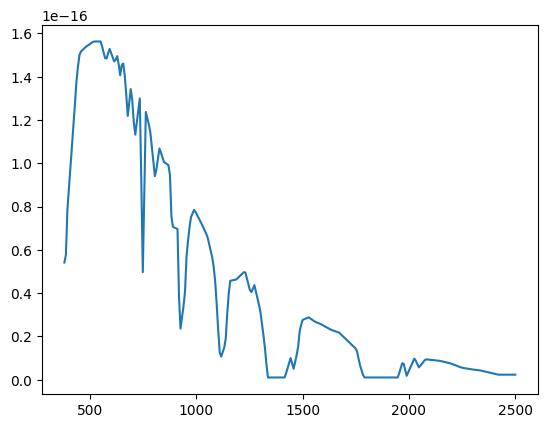

In [43]:
plt.plot(lamb_range, sun_function(lamb_range))

In [44]:
def photon_function(lamb):
    return sun_function(lamb)/((h*c)/(lamb*1e-9))

photon_function(380)

103.46228954342077

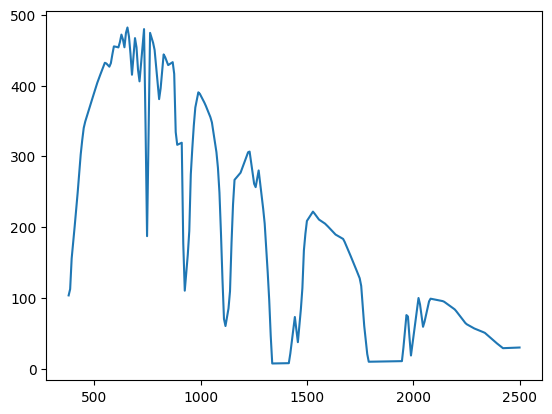

In [45]:
plt.plot(lamb_range, photon_function(lamb_range))

In [46]:
sun_energy = quad(sun_function, 380,2500, limit = 1000)[0]
sun_energy

9.487822338653799e-14

In [81]:
def e_function(lamb):
    #return photon_function(lamb)*green_function(lamb)
    return photon_function(lamb)*sum_efficiency(lamb)

In [82]:
Photon = quad(photon_function, 380, 1000, limit = 100)
Photon

C:\Users\cahya\AppData\Local\Temp\ipykernel_21648\3483251003.py:1: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Photon = quad(photon_function, 380, 1000, limit = 100)


(231270.76558097402, 26.581274620627358)

In [83]:
Electron = quad(e_function, 380, 1000, limit= 100)
Electron

C:\Users\cahya\AppData\Local\Temp\ipykernel_21648\703903141.py:1: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Electron = quad(e_function, 380, 1000, limit= 100)


(42070.007186875075, 17.862300861925178)